# Comparison of genetic variant frequencies: Africans vs Asians/Europeans

This analysis aimed to answer the following research questions: 

**1. How do frequencies of variants in the studied genes among Africans compare with those of Europeans/Asians?**
 
**2. Have any of the genetic variants identified in Africans been previously linked to HIE, and if so, do these variants exhibit significantly different frequencies in Africans compared to the populations studied in HIE research?**

To achieve this, the following steps were performed: 

1. In-house Data Generation: In-house genetic variant allele count data on African populations was generated from genetic information obtained from the [GnomAD 1000 Genomes and HGDP datasets](https://gnomad.broadinstitute.org/news/2021-10-gnomad-v3-1-2-minor-release/). This data was prepared for analysis by following the steps outlined in the `Notebooks\Data_preparation\2-IH_allele_counts.ipynb` Jupyter notebook. The prepared data is stored in the `Data\Processed\IH_allele_counts_fishers.csv` file.
2. ALFA Data Retrieval: Variant allele count data on other global populations was retrieved from the [NCBI ALFA database](https://www.ncbi.nlm.nih.gov/snp/docs/gsr/alfa/). This data was prepared for analysis by following the steps outlined in the  `Notebooks\Data_preparation\3-ALFA_allele_counts_a.ipynb` and `Notebooks\Data_preparation\3-ALFA_allele_counts_b.ipynb` notebooks. The prepared data is stored in `Data\Processed\ALFA_allele_counts_b.csv`
3. Research Question 1 Analysis and Visualisation:
    * Variant allele count data generated in-house and the data fetched from ALFA were combined into a unified dataframe for analysis.
    * Variant allele frequencies were calculated. 
    * African variant frequencies were compared visually to that of European and Asian populations by constructing scatter plots.
    * The concordance correlation coefficient was calculated for each comparison population pair to gauge the degree of correlation of their allele frequency data.
    * Two-tailed Fisher's Exact Tests were conducted to test for significant differences in variant allele frequencies among the comparison population groups. Additionally, to account for multiple comparisons, the Bonferroni method was employed to correct the Fisher's test results. 
    * The number of variants with significant differences for each comparison population group were plotted.
4. Research Question 2 Analysis and Visualisation:
    * The presence of HIE variants within the in-house African and ALFA global variant frequency data was determined
    * To visually compare the variant allele frequencies for HIE variants across different population groups, a heatmap was constructed.
    * Significant differences in frequency for HIE variants were determined by employing a two-tailed Fisher's Exact Test. This analysis specifically focused on variants occurring in both the in-house African data and the European/Asian ALFA data.

## Imports

Notebook setup

In [1]:
import os
import sys

from dotenv import load_dotenv

load_dotenv()

PROJECT_ROOT = os.getenv("PROJECT_ROOT")
if PROJECT_ROOT not in sys.path:
    os.chdir(PROJECT_ROOT + "/Notebooks")
    sys.path.append(PROJECT_ROOT)

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import Utils.constants as constants
import Utils.functions as functions

pd.options.mode.chained_assignment = None

Import in-house variant allele count data

In [2]:
ih_data = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "IH_allele_counts_fishers.csv",
    )
).drop(columns="Unnamed: 0")

ih_data.head(5)

,VAR_NAME,ID,REF,ALT,GENE,POS,ALT_CT_IH_CA,ALT_CT_IH_EA,ALT_CT_IH_Recent African,ALT_CT_IH_SA,ALT_CT_IH_WA,CORR_REF_CT_IH_CA,CORR_REF_CT_IH_EA,CORR_REF_CT_IH_Recent African,CORR_REF_CT_IH_SA,CORR_REF_CT_IH_WA
0,chr11:34438836T-C,34438836_C_T,T,C,CAT,34438836,0.0,1.0,1.0,0.0,0.0,0.0,217.0,1607.0,0.0,0.0
1,chr11:34438889G-C,34438889_C_G,G,C,CAT,34438889,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1607.0,27.0,0.0
2,chr11:34439223G-C,34439223_C_G,G,C,CAT,34439223,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1606.0,0.0,1280.0
3,chr11:34439262C-T,34439262_T_C,C,T,CAT,34439262,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1607.0,0.0,0.0
4,chr11:34439312G-A,34439312_A_G,G,A,CAT,34439312,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1607.0,27.0,0.0


Import ALFA variant allele count data

In [3]:
alfa_data = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "ALFA_allele_counts_b.csv",
    )
).drop(columns="Unnamed: 0")

alfa_data.head(5)

,variant_id,reference_allele,alternate_allele,ALT_CT_ALFA_African Others,ALT_CT_ALFA_East Asian,ALT_CT_ALFA_European,ALT_CT_ALFA_South Asian,REF_CT_ALFA_African Others,REF_CT_ALFA_East Asian,REF_CT_ALFA_European,REF_CT_ALFA_South Asian
0,rs1000343,C,T,24.0,0.0,49.0,0.0,296.0,490.0,109377.0,184.0
1,rs1000989,T,C,47.0,55.0,21489.0,1685.0,135.0,109.0,37269.0,3283.0
2,rs1000990,T,C,31.0,32.0,5355.0,36.0,83.0,54.0,8931.0,62.0
3,rs1005573,C,T,111.0,35.0,10693.0,79.0,15.0,69.0,4955.0,31.0
4,rs1007311,A,G,67.0,56.0,9154.0,43.0,55.0,56.0,11242.0,55.0


## Analysis and Visualisation

### Data integration
Combine variant allele count data generated in-house and the data fetched from ALFA into a unified dataframe for analysis.

Filter in-house data for variants with rsIDs. ALFA data is only available for variants with rsIDs.

In [4]:
ih_data_rsids = ih_data[ih_data.VAR_NAME.str.contains("rs")]

Merge in-house and ALFA variant count data

In [5]:
ih_alfa_data = ih_data_rsids.merge(
    alfa_data,
    how="left",
    left_on=["VAR_NAME", "REF", "ALT"],
    right_on=["variant_id", "reference_allele", "alternate_allele"],
).drop(columns=["variant_id", "reference_allele", "alternate_allele"])

ih_alfa_data.head(5)

,VAR_NAME,ID,REF,ALT,GENE,POS,ALT_CT_IH_CA,ALT_CT_IH_EA,ALT_CT_IH_Recent African,ALT_CT_IH_SA,...,CORR_REF_CT_IH_SA,CORR_REF_CT_IH_WA,ALT_CT_ALFA_African Others,ALT_CT_ALFA_East Asian,ALT_CT_ALFA_European,ALT_CT_ALFA_South Asian,REF_CT_ALFA_African Others,REF_CT_ALFA_East Asian,REF_CT_ALFA_European,REF_CT_ALFA_South Asian
0,rs1000343,34452510_T_C,C,T,CAT,34452510,1.0,9.0,131.0,1.0,...,27.0,1206.0,24.0,0.0,49.0,0.0,296.0,490.0,109377.0,184.0
1,rs1000989,110174956_C_T,T,C,COL4A1,110174956,29.0,37.0,422.0,12.0,...,16.0,1029.0,47.0,55.0,21489.0,1685.0,135.0,109.0,37269.0,3283.0
2,rs1000990,110174971_C_T,T,C,COL4A1,110174971,29.0,37.0,419.0,8.0,...,20.0,1028.0,31.0,32.0,5355.0,36.0,83.0,54.0,8931.0,62.0
3,rs1005573,33026408_T_C,C,T,OLIG2,33026408,70.0,187.0,1409.0,28.0,...,0.0,508.0,111.0,35.0,10693.0,79.0,15.0,69.0,4955.0,31.0
4,rs1007311,150998920_G_A,A,G,NOS3,150998920,24.0,135.0,900.0,10.0,...,18.0,790.0,67.0,56.0,9154.0,43.0,55.0,56.0,11242.0,55.0


### Calculate variant allele frequencies

The alternate allele frequency for a variant can be calculated by dividing the alternate allele count of a variant for a specific population group by the sum of the alternate and reference allele counts. 

In [6]:
ih_alfa_frequencies = pd.DataFrame()

# Get details on variant IDs, names and the associated gene

ih_alfa_frequencies["ID"] = ih_alfa_data["ID"]

ih_alfa_frequencies["VAR_NAME"] = ih_alfa_data["VAR_NAME"]

ih_alfa_frequencies["POS"] = ih_alfa_data["POS"]

ih_alfa_frequencies["REF"] = ih_alfa_data["REF"]

ih_alfa_frequencies["ALT"] = ih_alfa_data["ALT"]

ih_alfa_frequencies["GENE"] = ih_alfa_data["GENE"]

# Calculate frequencies

ih_alfa_frequencies["CORR_IH_Recent African_ALT_AF"] = ih_alfa_data[
    "ALT_CT_IH_Recent African"
] / (
    ih_alfa_data["ALT_CT_IH_Recent African"]
    + ih_alfa_data["CORR_REF_CT_IH_Recent African"]
)
ih_alfa_frequencies["ALFA_African_ALT_AF"] = ih_alfa_data[
    "ALT_CT_ALFA_African Others"
] / (
    ih_alfa_data["ALT_CT_ALFA_African Others"]
    + ih_alfa_data["REF_CT_ALFA_African Others"]
)
ih_alfa_frequencies["ALFA_East Asian_ALT_AF"] = ih_alfa_data[
    "ALT_CT_ALFA_East Asian"
] / (ih_alfa_data["ALT_CT_ALFA_East Asian"] + ih_alfa_data["REF_CT_ALFA_East Asian"])
ih_alfa_frequencies["ALFA_South Asian_ALT_AF"] = ih_alfa_data[
    "ALT_CT_ALFA_South Asian"
] / (ih_alfa_data["ALT_CT_ALFA_South Asian"] + ih_alfa_data["REF_CT_ALFA_South Asian"])
ih_alfa_frequencies["ALFA_European_ALT_AF"] = ih_alfa_data["ALT_CT_ALFA_European"] / (
    ih_alfa_data["ALT_CT_ALFA_European"] + ih_alfa_data["REF_CT_ALFA_European"]
)

ih_alfa_frequencies.head(5)

,ID,VAR_NAME,POS,REF,ALT,GENE,CORR_IH_Recent African_ALT_AF,ALFA_African_ALT_AF,ALFA_East Asian_ALT_AF,ALFA_South Asian_ALT_AF,ALFA_European_ALT_AF
0,34452510_T_C,rs1000343,34452510,C,T,CAT,0.081468,0.075000,0.000000,0.000000,0.000448
1,110174956_C_T,rs1000989,110174956,T,C,COL4A1,0.262438,0.258242,0.335366,0.339171,0.365720
2,110174971_C_T,rs1000990,110174971,T,C,COL4A1,0.260572,0.271930,0.372093,0.367347,0.374843
3,33026408_T_C,rs1005573,33026408,C,T,OLIG2,0.876244,0.880952,0.336538,0.718182,0.683346
4,150998920_G_A,rs1007311,150998920,A,G,NOS3,0.559701,0.549180,0.500000,0.438776,0.448813


Remove rows with alt allele frequencies of 0. We only want to include variants that are present in all comparison populations.

In [7]:
ih_alfa_frequencies = ih_alfa_frequencies[
    (ih_alfa_frequencies["CORR_IH_Recent African_ALT_AF"] != 0)
    & (ih_alfa_frequencies["ALFA_African_ALT_AF"] != 0)
    & (ih_alfa_frequencies["ALFA_European_ALT_AF"] != 0)
    & (ih_alfa_frequencies["ALFA_East Asian_ALT_AF"] != 0)
    & (ih_alfa_frequencies["ALFA_South Asian_ALT_AF"] != 0)
]

### Visualise the variant frequency correlation between Africans and Asians/Europeans

Set plot parameters

In [8]:
sns.set(rc={"figure.figsize": (10, 7)})  # set plot size

plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

Compare the variant allele frequencies for the Recent African population to that of the ALFA East Asian, South Asian and European populations using a scatter plot. To see how the African data generated in-house compares to that from ALFA, compare the African data generated in-house to the ALFA African Others data. The ALFA African Others data also excludes African American and Caribbean populations.

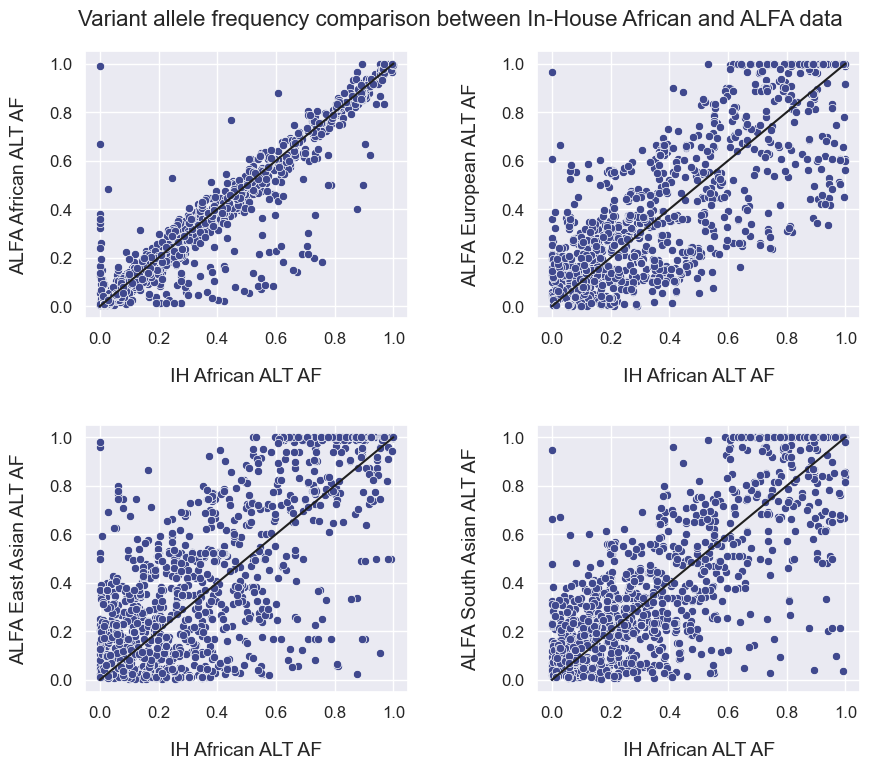

In [9]:
comparison_populations = [
    ["CORR_IH_Recent African_ALT_AF", "ALFA_African_ALT_AF"],
    ["CORR_IH_Recent African_ALT_AF", "ALFA_European_ALT_AF"],
    ["CORR_IH_Recent African_ALT_AF", "ALFA_East Asian_ALT_AF"],
    ["CORR_IH_Recent African_ALT_AF", "ALFA_South Asian_ALT_AF"],
]

# Create figure with subplots

fig, axes = plt.subplots(2, 2)

# Adjust subplot parameters

plt.subplots_adjust(
    left=0.125, bottom=0.005, right=0.9, top=0.92, wspace=0.4, hspace=0.4
)

# Set title for figure
plt.suptitle(
    "Variant allele frequency comparison between In-House African and ALFA data",
    size=constants.LARGEST_FONT,
)

for ax, pair in zip(axes.ravel(), comparison_populations):
    # Create a scatter plot with an identity line comparing the non-imputed in-house data to that of the alfa. Annotate the plot with the concordance correlation coefficients of the data
    sns.scatterplot(
        data=ih_alfa_frequencies,
        x=ih_alfa_frequencies[pair[0]],
        y=ih_alfa_frequencies[pair[1]],
        color="#40498E",
        ax=ax,
    )
    ax.plot([0, 1], [0, 1], color="#202020")

    # Set x and y labels for each subplot

    ax.set_xlabel(xlabel="IH African ALT AF", labelpad=15)
    ax.set_ylabel(ylabel=pair[1].replace("_", " "), labelpad=15)

plt.savefig(
    "..\Results\Figures\Variant_frequency_comparisons_IH_vs_ALFA.png",
    dpi=1200,
    bbox_inches="tight",
)

plt.show()

From the plots above, we can see that the African variant frequency data generated in-house is similar to that generated by the ALFA project for African populations. Additionally, we can see that African variant frequencies differ from ALFA European and Asian variant frequencies. At this point, we do not know whether any of these differences are statistically significant.

Calculate the concordance correlation coefficient (CCC) for each comparison population pair to access the correlation between their allele frequency data. 

In [10]:
# Calculate the concordance correlation coefficient (CCC) for each comparison population pair

ccc_values = pd.DataFrame()

for pair in comparison_populations:
    temp_ccc_dataframe = pd.DataFrame()

    y_true = ih_alfa_frequencies[pair[1]]
    x_pred = ih_alfa_frequencies[pair[0]]
    ccc = round(functions.calculate_ccc(y_true, x_pred), 4)

    temp_ccc_dataframe["Comparison population 1"] = [pair[0]]
    temp_ccc_dataframe["Comparison population 2"] = [pair[1]]
    temp_ccc_dataframe["CCC value"] = ccc

    ccc_values = pd.concat([ccc_values, temp_ccc_dataframe])

ccc_values = ccc_values.reset_index(drop=True)
ccc_values

,Comparison population 1,Comparison population 2,CCC value
0,CORR_IH_Recent African_ALT_AF,ALFA_African_ALT_AF,0.9384
1,CORR_IH_Recent African_ALT_AF,ALFA_European_ALT_AF,0.7776
2,CORR_IH_Recent African_ALT_AF,ALFA_East Asian_ALT_AF,0.7133
3,CORR_IH_Recent African_ALT_AF,ALFA_South Asian_ALT_AF,0.7725


### Determine if frequency differences are significant

Select allele count data for the analysis

In [11]:
ih_alfa_comparisons = ih_alfa_data[
    [
        "ID",
        "VAR_NAME",
        "REF",
        "ALT",
        "POS",
        "GENE",
        "ALT_CT_IH_Recent African",
        "CORR_REF_CT_IH_Recent African",
        "ALT_CT_ALFA_African Others",
        "REF_CT_ALFA_African Others",
        "ALT_CT_ALFA_East Asian",
        "REF_CT_ALFA_East Asian",
        "ALT_CT_ALFA_South Asian",
        "REF_CT_ALFA_South Asian",
        "ALT_CT_ALFA_European",
        "REF_CT_ALFA_European",
    ]
].rename(columns={"CORR_REF_CT_IH_Recent African": "REF_CT_IH_Recent African"})

ih_alfa_comparisons.head(5)

,ID,VAR_NAME,REF,ALT,POS,GENE,ALT_CT_IH_Recent African,REF_CT_IH_Recent African,ALT_CT_ALFA_African Others,REF_CT_ALFA_African Others,ALT_CT_ALFA_East Asian,REF_CT_ALFA_East Asian,ALT_CT_ALFA_South Asian,REF_CT_ALFA_South Asian,ALT_CT_ALFA_European,REF_CT_ALFA_European
0,34452510_T_C,rs1000343,C,T,34452510,CAT,131.0,1477.0,24.0,296.0,0.0,490.0,0.0,184.0,49.0,109377.0
1,110174956_C_T,rs1000989,T,C,110174956,COL4A1,422.0,1186.0,47.0,135.0,55.0,109.0,1685.0,3283.0,21489.0,37269.0
2,110174971_C_T,rs1000990,T,C,110174971,COL4A1,419.0,1189.0,31.0,83.0,32.0,54.0,36.0,62.0,5355.0,8931.0
3,33026408_T_C,rs1005573,C,T,33026408,OLIG2,1409.0,199.0,111.0,15.0,35.0,69.0,79.0,31.0,10693.0,4955.0
4,150998920_G_A,rs1007311,A,G,150998920,NOS3,900.0,708.0,67.0,55.0,56.0,56.0,43.0,55.0,9154.0,11242.0


Remove rows with variant alternate allele counts of 0. We only want to include variants that are present in all comparison populations.

In [12]:
ih_alfa_comparisons = ih_alfa_comparisons[
    (ih_alfa_comparisons["ALT_CT_IH_Recent African"] != 0)
    & (ih_alfa_comparisons["ALT_CT_ALFA_African Others"] != 0)
    & (ih_alfa_comparisons["ALT_CT_ALFA_East Asian"] != 0)
    & (ih_alfa_comparisons["ALT_CT_ALFA_South Asian"] != 0)
    & (ih_alfa_comparisons["ALT_CT_ALFA_European"] != 0)
]

Perform a two-tailed Fisher's Exact Test to determine if population differences in allele frequencies for variants are statistically significant 

In [13]:
# Generate comparison population combinations

comp_populations = [
    ("IH_Recent African", "ALFA_East Asian"),
    ("IH_Recent African", "ALFA_South Asian"),
    ("IH_Recent African", "ALFA_European"),
    ("IH_Recent African", "ALFA_African Others"),
]

In [14]:
# Calculate fisher's exact odds ratios and p-values for each variant for the different population combination

fishers_results = functions.fishers_test(
    ih_alfa_comparisons.replace(np.NAN, 0), comp_populations
)
fishers_results.head(5)

,ID,VAR_NAME,REF,ALT,GENE,POS,PVALUE_IH_Recent African_ALFA_East Asian,OR_IH_Recent African_ALFA_East Asian,PVALUE_IH_Recent African_ALFA_South Asian,OR_IH_Recent African_ALFA_South Asian,PVALUE_IH_Recent African_ALFA_European,OR_IH_Recent African_ALFA_European,PVALUE_IH_Recent African_ALFA_African Others,OR_IH_Recent African_ALFA_African Others
0,110174956_C_T,rs1000989,T,C,COL4A1,110174956,5.200182e-02,0.705166,7.213253e-09,0.693264,3.934938e-18,0.617105,1.000000,1.022030
0,110174971_C_T,rs1000990,T,C,COL4A1,110174971,3.241684e-02,0.594670,2.502565e-02,0.606906,2.904355e-20,0.587723,0.825431,0.943514
0,33026408_T_C,rs1005573,C,T,OLIG2,33026408,4.683343e-34,13.958507,1.829078e-05,2.778386,3.296705e-67,3.280968,1.000000,0.956811
0,150998920_G_A,rs1007311,A,G,NOS3,150998920,2.382782e-01,1.271186,2.128952e-02,1.625936,1.174584e-17,1.561140,0.850243,1.043511
0,151008522_C_T,rs1008140,T,C,NOS3,151008522,5.660992e-03,1.990415,7.276266e-11,32.130990,1.482368e-222,13.716133,0.501688,1.184771


Since multiple Fisher's Tests were performed, the results need to be corrected for multiple testing. Perform this correction using the Bonferroni method.

In [15]:
# Generate a list with column names for all subpopulation p-values in the fishers_results dataframe
p_value_combinations_list = []
for combination in comp_populations:
    first_pop = combination[0]
    second_pop = combination[1]
    p_value_combinations = "PVALUE_{}_{}".format(first_pop, second_pop)
    p_value_combinations_list.append(p_value_combinations)

# Correct for multiple testing for the entire dataset
multipletests_results = functions.multipletest_correction_wholedf(
    fishers_results, p_value_combinations_list, 0.05, "bonferroni"
)

multipletests_results.head(5)

variable,ID,VAR_NAME,REF,ALT,PVALUE_IH_Recent African_ALFA_African Others,PVALUE_IH_Recent African_ALFA_East Asian,PVALUE_IH_Recent African_ALFA_European,PVALUE_IH_Recent African_ALFA_South Asian
0,110149776_T_G,rs13260,G,T,1.0,2.747751e-48,2.749505e-81,1.120553e-09
1,110150188_T_C,rs560166628,C,T,1.0,1.000000e+00,1.000000e+00,1.000000e+00
2,110150508_C_T,rs188362373,T,C,1.0,1.000000e+00,1.000000e+00,1.000000e+00
3,110151306_TA_T,rs571140968,T,TA,1.0,1.000000e+00,1.000000e+00,1.000000e+00
4,110152180_T_C,rs75273185,C,T,1.0,1.000000e+00,4.657543e-12,1.000000e+00


Combine the Bonferroni-corrected p-values with the rest of the Fisher's Test results, including the odds ratios. 

In [16]:
# Melt the dataframe containing the Bonferroni-corrected p-values so that this data can be combined with the the rest of the Fisher's results

pvalue_table = multipletests_results.melt(id_vars=["ID", "VAR_NAME", "REF", "ALT"]).rename(
    columns={"variable": "COMP_POPS", "value": "CORR_PVALUE"}
)
pvalue_table["COMP_POPS"] = pvalue_table["COMP_POPS"].apply(
    lambda x: str(x).replace("PVALUE_", "")
)

In [17]:
# Convert the dataframe containing the remaining Fisher's results, such as the odds ratios, into a suitable format for combination with the corrected p-values.

fishers_df_OR_columns = fishers_results.columns.str.contains("OR_*|ID|VAR_NAME|REF|ALT")
or_table = (
    fishers_results.iloc[:, fishers_df_OR_columns]
    .melt(id_vars=["ID", "VAR_NAME", "REF", "ALT"])
    .rename(columns={"variable": "COMP_POPS", "value": "OR"})
)
or_table["COMP_POPS"] = or_table["COMP_POPS"].apply(lambda x: str(x).replace("OR_", ""))

In [18]:
# Combine the corrected p-value data with the remaining Fisher's test data

pvalue_or_table = pd.merge(pvalue_table, or_table, on=["ID", "VAR_NAME", "REF", "ALT", "COMP_POPS"])
pvalue_or_table.head(5)

,ID,VAR_NAME,REF,ALT,COMP_POPS,CORR_PVALUE,OR
0,110149776_T_G,rs13260,G,T,IH_Recent African_ALFA_African Others,1.0,1.740627
1,110150188_T_C,rs560166628,C,T,IH_Recent African_ALFA_African Others,1.0,NaN
2,110150508_C_T,rs188362373,T,C,IH_Recent African_ALFA_African Others,1.0,NaN
3,110151306_TA_T,rs571140968,T,TA,IH_Recent African_ALFA_African Others,1.0,NaN
4,110152180_T_C,rs75273185,C,T,IH_Recent African_ALFA_African Others,1.0,0.281796


Format the data so that is it useable for further analysis. Start by adding in the variant allele count information that was used to conduct the Fisher's Exact Tests.

In [19]:
# Temporarily rename the REF and ALT columns
ih_alfa_data = ih_alfa_data.rename(columns={"REF": "REF_AL", "ALT": "ALT_AL"})

# Subset ALT count data and format
ih_ALFA_data_ALT_columns = ih_alfa_data.columns.str.contains(
    "ALT_CT_*|ID|VAR_NAME|REF_AL|ALT_AL"
)
alt_count_table = ih_alfa_data.iloc[:, ih_ALFA_data_ALT_columns].melt(
    id_vars=["ID", "VAR_NAME", "REF_AL", "ALT_AL"], value_name="ALT_CTS", var_name="REG"
)

# Remove unnecessary info from the comparison column
alt_count_table["REG"] = alt_count_table["REG"].apply(
    lambda x: str(x).replace("ALT_CT_", "")
)

# Subset REF count data and format
ih_ALFA_data_REF_columns = ih_alfa_data.columns.str.contains(
    "REF_CT_*|ID|VAR_NAME|REF_AL|ALT_AL"
)
ref_count_table = ih_alfa_data.iloc[:, ih_ALFA_data_REF_columns].melt(
    id_vars=["ID", "VAR_NAME", "REF_AL", "ALT_AL"], value_name="REF_CTS", var_name="REG"
)

# Remove unnecessary info from the comparison column
ref_count_table["REG"] = alt_count_table["REG"].apply(
    lambda x: str(x).replace("REF_CT_", "")
)

# Combine formatted alt and ref count data
count_table = pd.merge(
    alt_count_table, ref_count_table, on=["ID", "VAR_NAME", "REF_AL", "ALT_AL", "REG"]
).rename(columns={"REF_AL": "REF", "ALT_AL": "ALT"})
count_table.head(5)

,ID,VAR_NAME,REF,ALT,REG,ALT_CTS,REF_CTS
0,34452510_T_C,rs1000343,C,T,IH_CA,1.0,79.0
1,110174956_C_T,rs1000989,T,C,IH_CA,29.0,51.0
2,110174971_C_T,rs1000990,T,C,IH_CA,29.0,51.0
3,33026408_T_C,rs1005573,C,T,IH_CA,70.0,10.0
4,150998920_G_A,rs1007311,A,G,IH_CA,24.0,56.0


Refine the dataset by retaining only the rows with significant p-values. Then, merge the significant p-value, odds ratio, and allele count data. Finally, compute the variant alternate allele frequencies.

In [20]:
# Filter p-value and odds ratio table by significant p-values

sign_pvalue_or_table = pvalue_or_table[pvalue_or_table.CORR_PVALUE < 0.05]

# Add empty count columns to p-value and odds ratio table
sign_pvalue_or_table.loc[:, "POP1_REF_CTS"] = ""
sign_pvalue_or_table.loc[:, "POP1_ALT_CTS"] = ""
sign_pvalue_or_table.loc[:, "POP2_REF_CTS"] = ""
sign_pvalue_or_table.loc[:, "POP2_ALT_CTS"] = ""

# Iterate over row in p-value and odds ratio table and append count data
for index, row in sign_pvalue_or_table.iterrows():
    # Extract variant ID, ref allele and alt allele information
    id = row["ID"]
    ref = row["REF"]
    alt = row["ALT"]

    # Split comparison population column into the two comparison populations
    comp_pops = row["COMP_POPS"]
    split_pops = comp_pops.split("_", 2)
    split_pops = ["_".join(split_pops[0:2])] + split_pops[2:]
    comp_pop1 = split_pops[0]
    comp_pop2 = split_pops[1]

    # Fetch row in count table with information for each comparison population
    pop1_count_table_row = count_table.loc[
        (count_table.ID == id)
        & (count_table.REF == ref)
        & (count_table.ALT == alt)
        & (count_table.REG == comp_pop1)
    ]
    pop2_count_table_row = count_table.loc[
        (count_table.ID == id)
        & (count_table.REF == ref)
        & (count_table.ALT == alt)
        & (count_table.REG == comp_pop2)
    ]

    # Extract ref and alt count information for relevant comparison population
    pop1_ref = pop1_count_table_row["REF_CTS"].values
    pop1_alt = pop1_count_table_row["ALT_CTS"].values
    pop2_ref = pop2_count_table_row["REF_CTS"].values
    pop2_alt = pop2_count_table_row["ALT_CTS"].values

    # Append ref and alt count information to p-value and odds ratio table
    sign_pvalue_or_table.at[index, "POP1_REF_CTS"] = pop1_ref
    sign_pvalue_or_table.at[index, "POP1_ALT_CTS"] = pop1_alt
    sign_pvalue_or_table.at[index, "POP2_REF_CTS"] = pop2_ref
    sign_pvalue_or_table.at[index, "POP2_ALT_CTS"] = pop2_alt

# # Change count data format from list to float
sign_pvalue_or_table["POP1_REF_CTS"] = sign_pvalue_or_table["POP1_REF_CTS"].str[0]
sign_pvalue_or_table["POP1_ALT_CTS"] = sign_pvalue_or_table["POP1_ALT_CTS"].str[0]
sign_pvalue_or_table["POP2_REF_CTS"] = sign_pvalue_or_table["POP2_REF_CTS"].str[0]
sign_pvalue_or_table["POP2_ALT_CTS"] = sign_pvalue_or_table["POP2_ALT_CTS"].str[0]

# Calculate alt allele frequencies and append results to table
sign_pvalue_or_table["POP1_ALT_FREQ"] = sign_pvalue_or_table["POP1_ALT_CTS"].astype(
    float
) / (
    sign_pvalue_or_table["POP1_ALT_CTS"].astype(float)
    + sign_pvalue_or_table["POP1_REF_CTS"].astype(float)
)
sign_pvalue_or_table["POP2_ALT_FREQ"] = sign_pvalue_or_table["POP2_ALT_CTS"].astype(
    float
) / (
    sign_pvalue_or_table["POP2_ALT_CTS"].astype(float)
    + sign_pvalue_or_table["POP2_REF_CTS"].astype(float)
)

sign_pvalue_or_table.head(5)

,ID,VAR_NAME,REF,ALT,COMP_POPS,CORR_PVALUE,OR,POP1_REF_CTS,POP1_ALT_CTS,POP2_REF_CTS,POP2_ALT_CTS,POP1_ALT_FREQ,POP2_ALT_FREQ
32,110158027_G_A,rs585659,A,G,IH_Recent African_ALFA_African Others,1.787090e-03,24.975000,960.0,648.0,37.0,1.0,0.402985,0.026316
44,110159006_A_G,rs559000657,G,A,IH_Recent African_ALFA_African Others,2.202302e-45,0.001015,1607.0,1.0,62.0,38.0,0.000622,0.380000
122,110170107_A_G,rs112790627,G,A,IH_Recent African_ALFA_African Others,6.180710e-28,0.001963,1607.0,1.0,82.0,26.0,0.000622,0.240741
214,110188529_C_T,rs561741652,T,C,IH_Recent African_ALFA_African Others,4.836541e-65,0.001101,1607.0,1.0,115.0,65.0,0.000622,0.361111
221,110189811_A_T,rs3783105,T,A,IH_Recent African_ALFA_African Others,2.650896e-03,14.450549,819.0,789.0,30.0,2.0,0.490672,0.062500


In [21]:
# Save the formatted Bonferroni-corrected Fisher's Test results

sign_pvalue_or_table.to_csv(
    os.path.join(
        PROJECT_ROOT,
        "Results",
        "Tables",
        "Significant_Fishers_results_bonferroni_corrected.csv",
    )
)

Calculate the number of variants with significant frequency differences for each comparison population group

In [22]:
IH_Afr_ALFA_Eur_significant = multipletests_results[
    multipletests_results["PVALUE_IH_Recent African_ALFA_European"] < 0.05
]["PVALUE_IH_Recent African_ALFA_European"].count()
IH_Afr_ALFA_Eur_notsignificant = (
    multipletests_results["PVALUE_IH_Recent African_ALFA_European"].count()
    - IH_Afr_ALFA_Eur_significant
)

IH_Afr_ALFA_Eas_significant = multipletests_results[
    multipletests_results["PVALUE_IH_Recent African_ALFA_East Asian"] < 0.05
]["PVALUE_IH_Recent African_ALFA_East Asian"].count()
IH_Afr_ALFA_Eas_notsignificant = (
    multipletests_results["PVALUE_IH_Recent African_ALFA_East Asian"].count()
    - IH_Afr_ALFA_Eas_significant
)

IH_Afr_ALFA_Sas_significant = multipletests_results[
    multipletests_results["PVALUE_IH_Recent African_ALFA_South Asian"] < 0.05
]["PVALUE_IH_Recent African_ALFA_South Asian"].count()
IH_Afr_ALFA_Sas_notsignificant = (
    multipletests_results["PVALUE_IH_Recent African_ALFA_South Asian"].count()
    - IH_Afr_ALFA_Sas_significant
)

IH_Afr_ALFA_Afr_significant = multipletests_results[
    multipletests_results["PVALUE_IH_Recent African_ALFA_African Others"] < 0.05
]["PVALUE_IH_Recent African_ALFA_African Others"].count()
IH_Afr_ALFA_Afr_notsignificant = (
    multipletests_results["PVALUE_IH_Recent African_ALFA_African Others"].count()
    - IH_Afr_ALFA_Sas_significant
)

Construct a dataframe to house the above information. Calculate the percentage significant variants for each comparison population group.

In [23]:
Significant_freq_differences = pd.DataFrame(
    {
        "Significant": [
            IH_Afr_ALFA_Eur_significant,
            IH_Afr_ALFA_Eas_significant,
            IH_Afr_ALFA_Sas_significant,
            IH_Afr_ALFA_Afr_significant,
        ],
        "Not significant": [
            IH_Afr_ALFA_Eur_notsignificant,
            IH_Afr_ALFA_Eas_notsignificant,
            IH_Afr_ALFA_Sas_notsignificant,
            IH_Afr_ALFA_Afr_notsignificant,
        ],
    },
    index=[
        "IH Africa vs ALFA Europe",
        "IH Africa vs ALFA East Asia",
        "IH Africa vs ALFA South Asia",
        "IH Africa vs ALFA Africa",
    ],
)

Significant_freq_differences["Percentage significant"] = (
    Significant_freq_differences["Significant"]
    / (
        Significant_freq_differences["Significant"]
        + Significant_freq_differences["Not significant"]
    )
) * 100

Significant_freq_differences.head(5)

,Significant,Not significant,Percentage significant
IH Africa vs ALFA Europe,1037,1192,46.523105
IH Africa vs ALFA East Asia,565,1664,25.347690
IH Africa vs ALFA South Asia,458,1771,20.547331
IH Africa vs ALFA Africa,52,1771,2.852441


Construct a horizontal bar plot to visualise the number of variants with significant frequency differences for each comparison population group

In [24]:
# Set plot figure size
sns.set(rc={"figure.figsize": (7, 2)})

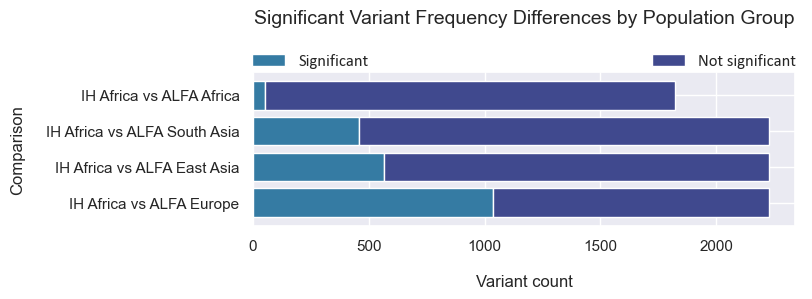

In [25]:
# Construct horizontal bar plot

ax = Significant_freq_differences[["Significant", "Not significant"]].plot(
    kind="barh", stacked=True, width=0.8, color=["#357BA3", "#40498E"]
)

# Rotate xticks

plt.xticks(rotation=0)

# Set x and y labels

plt.xlabel("Variant count", labelpad=15)
plt.ylabel("Comparison", labelpad=15)

# Add legend to plot

legend = plt.legend(
    loc="center",
    frameon=False,
    bbox_to_anchor=(0.0, 1.02, 1.0, 0.102),
    mode="expand",
    ncol=2,
    borderaxespad=-0.46,
    prop={"size": 12, "family": "Calibri"},
)

# Set plot title

plt.title(
    "Significant Variant Frequency Differences by Population Group",
    size=constants.BIGGER_FONT,
    pad=35,
    loc="center",
)

plt.savefig(
    "..\Results\Figures\Significant_freq_differences_Afr_vs_global.png",
    dpi=600,
    bbox_inches="tight",
)
plt.show()

### Have any of the genetic variants detected in African populations previously been associated with HIE? 

Make a list with rsID information of variants that have been associated with HIE. This information was manually retrieved from: https://doi.org/10.1016/j.ygeno.2022.110508.

In [26]:
hie_variant_rsids = [
    "rs2067853",
    "rs1217401",
    "rs2043211",
    "rs1001179",
    "rs1961495",
    "rs1411040",
    "rs34004222",
    "rs13027659",
    "rs190148408",
    "rs79704487",
    "rs1800896",
    "rs3024490",
    "rs1800871",
    "rs1554286",
    "rs1518111",
    "rs1143623",
    "rs16944",
    "rs1071676",
    "rs1800795",
    "rs2069837",
    "rs1800796",
    "rs2066992",
    "rs2069832",
    "rs2069833",
    "rs1554606",
    "rs2069845",
    "rs1801133",
    "rs4846049",
    "rs1476413",
    "rs1801131",
    "rs9651118",
    "rs1808593",
    "rs2070744",
    "rs1800779",
    "rs6517135",
    "rs1799964",
    "rs1799724",
    "rs361525",
    "rs1800629",
]

How many HIE variants are there with rsIDs?

In [27]:
len(hie_variant_rsids)

39

Determine which of these HIE variants are present in the in-house African and ALFA global variant frequency data.

In [42]:
ih_alfa_frequencies_hie = (
    ih_alfa_frequencies[ih_alfa_frequencies["VAR_NAME"].isin(hie_variant_rsids)]
    .reset_index(drop=True)
    .drop(columns=["ID", "ALFA_African_ALT_AF"])
)

freqs_list = ih_alfa_frequencies_hie["VAR_NAME"].unique().tolist()

freqs_list

['rs1071676',
 'rs1217401',
 'rs1411040',
 'rs1476413',
 'rs1518111',
 'rs1554286',
 'rs1554606',
 'rs1800779',
 'rs1800795',
 'rs1800796',
 'rs1800871',
 'rs1800896',
 'rs1801131',
 'rs1801133',
 'rs1808593',
 'rs1961495',
 'rs2043211',
 'rs2066992',
 'rs2067853',
 'rs2069832',
 'rs2069833',
 'rs2069837',
 'rs2069845',
 'rs2070744',
 'rs3024490',
 'rs4846049']

In [43]:
ih_alfa_frequencies_hie.head(5)

,VAR_NAME,POS,REF,ALT,GENE,CORR_IH_Recent African_ALT_AF,ALFA_East Asian_ALT_AF,ALFA_South Asian_ALT_AF,ALFA_European_ALT_AF
0,rs1071676,112829856,C,G,IL1B,0.145522,0.034884,0.132653,0.236899
1,rs1217401,113896329,A,G,AP4B1,0.807214,0.057899,0.327415,0.321924
2,rs1411040,110291574,C,T,COL4A1,0.822761,0.937500,0.718182,0.843280
3,rs1476413,11792243,C,T,MTHFR,0.140547,0.199875,0.412103,0.268016
4,rs1518111,206771300,T,C,IL10,0.552861,0.295049,0.603571,0.784843


### Visualise differences in allele frequency between populations for HIE-associated variants

Change the population alternate allele frequency column names in preparation for plotting

In [44]:
replacements = {"CORR_IH_Recent": "IH ", "_ALT_AF": "", "ALFA_": "ALFA "}

for key, value in replacements.items():
    ih_alfa_frequencies_hie.columns = ih_alfa_frequencies_hie.columns.str.replace(
        key, value
    )

ih_alfa_frequencies_hie.head(5)

,VAR_NAME,POS,REF,ALT,GENE,IH African,ALFA East Asian,ALFA South Asian,ALFA European
0,rs1071676,112829856,C,G,IL1B,0.145522,0.034884,0.132653,0.236899
1,rs1217401,113896329,A,G,AP4B1,0.807214,0.057899,0.327415,0.321924
2,rs1411040,110291574,C,T,COL4A1,0.822761,0.937500,0.718182,0.843280
3,rs1476413,11792243,C,T,MTHFR,0.140547,0.199875,0.412103,0.268016
4,rs1518111,206771300,T,C,IL10,0.552861,0.295049,0.603571,0.784843


Change the format of data in preparation for plotting.

In [45]:
# Melt data

heatmap_data = ih_alfa_frequencies_hie.melt(
    id_vars=["VAR_NAME", "POS", "REF", "ALT", "GENE"],
    value_vars=ih_alfa_frequencies_hie.iloc[:, 2:],
    var_name="POPULATION",
    value_name="ALT_AF",
)

heatmap_data.head(5)

,VAR_NAME,POS,REF,ALT,GENE,POPULATION,ALT_AF
0,rs1071676,112829856,C,G,IL1B,IH African,0.145522
1,rs1217401,113896329,A,G,AP4B1,IH African,0.807214
2,rs1411040,110291574,C,T,COL4A1,IH African,0.822761
3,rs1476413,11792243,C,T,MTHFR,IH African,0.140547
4,rs1518111,206771300,T,C,IL10,IH African,0.552861


In [46]:
# Pivot data

heatmap_data_pivot = heatmap_data.pivot(
    index="POPULATION", columns="VAR_NAME", values="ALT_AF"
).replace(np.NaN, 0.0)

heatmap_data_pivot.head(5)

VAR_NAME,rs1071676,rs1217401,rs1411040,rs1476413,rs1518111,rs1554286,rs1554606,rs1800779,rs1800795,rs1800796,...,rs2043211,rs2066992,rs2067853,rs2069832,rs2069833,rs2069837,rs2069845,rs2070744,rs3024490,rs4846049
POPULATION,,,,,,,,,,,,,,,,,,,,,
ALFA East Asian,0.034884,0.057899,0.937500,0.199875,0.295049,0.278947,0.989407,0.903846,1.000000,0.674419,...,0.455344,0.747368,0.100386,0.995984,1.000000,0.156015,0.988636,0.906250,0.177966,0.789634
ALFA European,0.236899,0.321924,0.843280,0.268016,0.784843,0.817239,0.566395,0.626175,0.559989,0.050165,...,0.323412,0.054238,0.318220,0.600349,0.451982,0.077174,0.539107,0.626583,0.756379,0.665869
ALFA South Asian,0.132653,0.327415,0.718182,0.412103,0.603571,0.656389,0.752827,0.771930,0.857143,0.397959,...,0.346715,0.291650,0.205479,0.815217,0.666667,0.157581,0.816327,0.755102,0.597751,0.500000
IH African,0.145522,0.807214,0.822761,0.140547,0.552861,0.554726,0.695274,0.853234,0.998756,0.101368,...,0.187811,0.080224,0.059701,0.998756,0.993781,0.124378,0.689055,0.851990,0.551617,0.465174


Set plot parameters

In [47]:
# Set plot figure size
sns.set(rc={"figure.figsize": (12, 10)})

Plot the allele frequencies for the HIE-associated variants as a heatmap

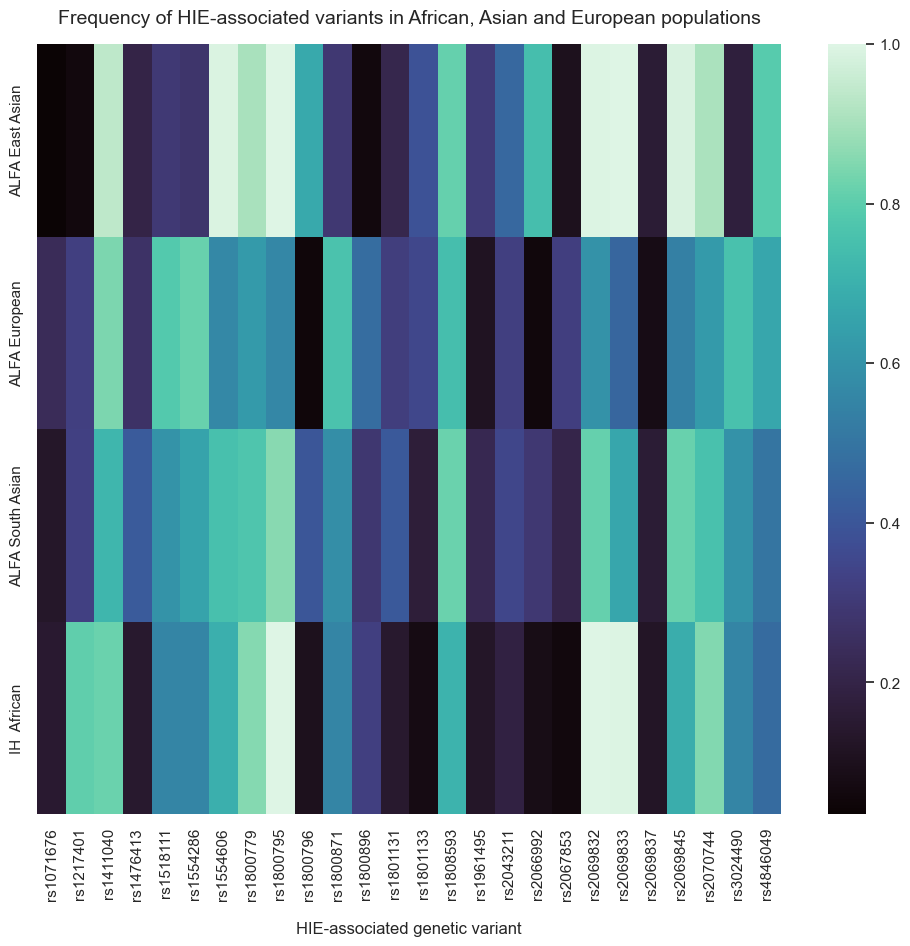

In [48]:
sns.heatmap(heatmap_data_pivot, cmap="mako")

plt.xlabel("HIE-associated genetic variant", labelpad=15)
plt.ylabel(None)
plt.title(
    "Frequency of HIE-associated variants in African, Asian and European populations",
    size=constants.BIGGER_FONT,
    pad=15,
)

plt.savefig(
    "..\Results\Figures\HIE_variant_frequency_comparisons.png",
    dpi=1200,
    bbox_inches="tight",
)
plt.show()

### Are the differences in frequency between the in-house African population and Europeans/Asians for HIE-associated variants statistically significant?

Extract data on HIE-associated variants with significant differences in frequency between Africa and Europeans/Asians, if the data is present.

In [56]:
ih_alfa_frequencies_sign_hie = (
    sign_pvalue_or_table[sign_pvalue_or_table["VAR_NAME"].isin(hie_variant_rsids)]
    .reset_index(drop=True)
)

ih_alfa_frequencies_sign_hie.head(5)


,ID,VAR_NAME,REF,ALT,COMP_POPS,CORR_PVALUE,OR,POP1_REF_CTS,POP1_ALT_CTS,POP2_REF_CTS,POP2_ALT_CTS,POP1_ALT_FREQ,POP2_ALT_FREQ
0,110229026_T_C,rs1961495,C,T,IH_Recent African_ALFA_East Asian,1.193650e-04,0.327568,1406.0,202.0,114.0,50.0,0.125622,0.304878
1,113896329_G_A,rs1217401,A,G,IH_Recent African_ALFA_East Asian,0.000000e+00,68.130252,310.0,1298.0,4735.0,291.0,0.807214,0.057899
2,11790308_G_T,rs4846049,T,G,IH_Recent African_ALFA_East Asian,4.411077e-24,0.231714,860.0,748.0,69.0,259.0,0.465174,0.789634
3,11792243_T_C,rs1476413,C,T,IH_Recent African_ALFA_East Asian,3.015661e-03,0.654635,1382.0,226.0,2562.0,640.0,0.140547,0.199875
4,11796321_A_G,rs1801133,G,A,IH_Recent African_ALFA_East Asian,2.223638e-127,0.128114,1488.0,120.0,1954.0,1230.0,0.074627,0.386307


Remove data on frequency comparisons between in-house African and ALFA African populations

In [50]:
ih_alfa_frequencies_sign_hie = ih_alfa_frequencies_sign_hie[ih_alfa_frequencies_sign_hie["COMP_POPS"] != "IH_Recent African_ALFA_African Others"]

Get a list of the HIE-associated variants that had significant differences in frequency between Africa and Europeans/Asians

In [51]:
sign_freqs_list = ih_alfa_frequencies_sign_hie["VAR_NAME"].unique().tolist()
sign_freqs_list

['rs1961495',
 'rs1217401',
 'rs4846049',
 'rs1476413',
 'rs1801133',
 'rs1808593',
 'rs1554286',
 'rs1518111',
 'rs3024490',
 'rs1800871',
 'rs1800896',
 'rs1800796',
 'rs2066992',
 'rs1554606',
 'rs2069845',
 'rs2043211',
 'rs1071676',
 'rs1801131',
 'rs1800779',
 'rs2070744',
 'rs1800795',
 'rs2069832',
 'rs2069833',
 'rs2069837',
 'rs2067853']

Get the number of HIE-associated variants that had significant differences in frequency between Africa and Europeans/Asians

In [52]:
ih_alfa_frequencies_sign_hie["VAR_NAME"].nunique()

25

It seems that one of HIE-associated variants that was found in Africans, Europeans and Asians was not present at a significantly different frequency in Africans compared to Asians/Europeans. Which variant is this? 

In [54]:
list(set(freqs_list).difference(set(sign_freqs_list)))

['rs1411040']